<a href="https://colab.research.google.com/github/lucasucaldas/reconocimiento-imagenes/blob/main/reconocimiento_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

## Import the keras API
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

#Cargar datos de ejemplo
import tensorflow as tf

In [11]:
def cargarDatos(fase,numeroCategorias,limite):
    imagenesCargadas=[]
    etiquetas=[]
    valorEsperado=[]
    for categoria in range(0,numeroCategorias):
        for idImagen in range(0,limite):
            ruta=fase+str(categoria)+"/"+str(categoria)+"_"+str(idImagen)+".jpg"
            print(ruta)
            imagen=cv2.imread(ruta,0)
            imagen=imagen.flatten()
            imagen=imagen/255
            imagenesCargadas.append(imagen)
            etiquetas.append(categoria)
            probabilidades=np.zeros(numeroCategorias)
            probabilidades[categoria]=1
            valorEsperado.append(probabilidades)
    imagenesEntrenamiento=np.array(imagenesCargadas)
    etiquetasEntrenamiento=np.array(etiquetas)
    valoresEsperados=np.array(valorEsperado)
    return imagenesEntrenamiento,etiquetasEntrenamiento,valoresEsperados

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


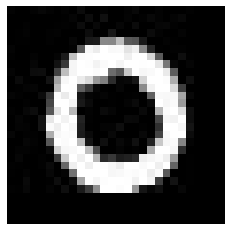

In [13]:
import cv2 
from matplotlib import pyplot as plt
 
path = '/content/drive/MyDrive/dataset/0/0_0.jpg'

imagen=cv2.imread(path,0)

if imagen is None:
  print("error al cargar la imagen")
else:
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()

In [14]:
img_size=28
#Numero de neuronas de la cnn
img_size_flat=img_size*img_size
#Parametrizar la forma de imagenes
num_chanels=1
#RGB, HSV -> num_chanels=3
img_shape=(img_size,img_size,num_chanels)
num_clases=10
limiteImagenesPrueba=60
imagenes,etiquetas,probabilidades=cargarDatos("/content/drive/MyDrive/dataset/",num_clases,limiteImagenesPrueba)

/content/drive/MyDrive/dataset/0/0_0.jpg
/content/drive/MyDrive/dataset/0/0_1.jpg
/content/drive/MyDrive/dataset/0/0_2.jpg
/content/drive/MyDrive/dataset/0/0_3.jpg
/content/drive/MyDrive/dataset/0/0_4.jpg
/content/drive/MyDrive/dataset/0/0_5.jpg
/content/drive/MyDrive/dataset/0/0_6.jpg
/content/drive/MyDrive/dataset/0/0_7.jpg
/content/drive/MyDrive/dataset/0/0_8.jpg
/content/drive/MyDrive/dataset/0/0_9.jpg
/content/drive/MyDrive/dataset/0/0_10.jpg
/content/drive/MyDrive/dataset/0/0_11.jpg
/content/drive/MyDrive/dataset/0/0_12.jpg
/content/drive/MyDrive/dataset/0/0_13.jpg
/content/drive/MyDrive/dataset/0/0_14.jpg
/content/drive/MyDrive/dataset/0/0_15.jpg
/content/drive/MyDrive/dataset/0/0_16.jpg
/content/drive/MyDrive/dataset/0/0_17.jpg
/content/drive/MyDrive/dataset/0/0_18.jpg
/content/drive/MyDrive/dataset/0/0_19.jpg
/content/drive/MyDrive/dataset/0/0_20.jpg
/content/drive/MyDrive/dataset/0/0_21.jpg
/content/drive/MyDrive/dataset/0/0_22.jpg
/content/drive/MyDrive/dataset/0/0_23.jpg
/c

In [15]:
model=Sequential()
#Capa entrada
model.add(InputLayer(input_shape=(img_size_flat,)))
#Reformar imagen
model.add(Reshape(img_shape))

#Capas convolucionales
model.add(Conv2D(kernel_size=5,strides=1,filters=16,padding='same',activation='relu',name='capa_convolucion_1'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(kernel_size=5,strides=1,filters=36,padding='same',activation='relu',name='capa_convolucion_2'))
model.add(MaxPooling2D(pool_size=2,strides=2))

#Aplanar imagen
model.add(Flatten())
#Capa densa
model.add(Dense(128,activation='relu'))


#Capa salida
model.add(Dense(num_clases,activation='softmax'))

In [17]:
#Compilacioon del modelo
optimizador=Adam(lr=1e-3)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [18]:
#Entrenamiento del modelo
model.fit(x=imagenes,y=probabilidades,epochs=10,batch_size=100)

limiteImagenesPrueba=20
imagenesPrueba,etiquetasPrueba,probabilidadesPrueba=cargarDatos("/content/drive/MyDrive/test/",num_clases,limiteImagenesPrueba)
resultados=model.evaluate(x=imagenesPrueba,y=probabilidadesPrueba)
print("{0}: {1:.2%}".format(model.metrics_names[1], resultados[1]))
#Carpeta y nombre del archivo como se almacenará el modelo
nombreArchivo='models/modeloReconocimientoNumeros.keras'
model.save(nombreArchivo)
model.summary()

Epoch 1/10
6/6 [==============================] - 2s 130ms/step - loss: 2.1707 - accuracy: 0.2800
Epoch 2/10
6/6 [==============================] - 1s 131ms/step - loss: 1.6411 - accuracy: 0.6083
Epoch 3/10
6/6 [==============================] - 1s 131ms/step - loss: 0.9987 - accuracy: 0.7650
Epoch 4/10
6/6 [==============================] - 1s 123ms/step - loss: 0.6663 - accuracy: 0.8033
Epoch 5/10
6/6 [==============================] - 1s 126ms/step - loss: 0.5266 - accuracy: 0.8317
Epoch 6/10
6/6 [==============================] - 1s 131ms/step - loss: 0.4527 - accuracy: 0.8633
Epoch 7/10
6/6 [==============================] - 1s 129ms/step - loss: 0.4197 - accuracy: 0.8667
Epoch 8/10
6/6 [==============================] - 1s 127ms/step - loss: 0.3308 - accuracy: 0.8800
Epoch 9/10
6/6 [==============================] - 1s 130ms/step - loss: 0.2732 - accuracy: 0.9050
Epoch 10/10
6/6 [==============================] - 1s 135ms/step - loss: 0.2105 - accuracy: 0.9367
/content/drive/MyDr

In [19]:
from tensorflow.python.keras.models import load_model
import numpy as np
import cv2

class prediccion():
    """
    Carga el modelo de la red neuronal de la ruta especificada
    """
    def __init__(self):
        self.rutaModelo="models/modeloReconocimientoNumeros.keras"
        self.model=load_model(self.rutaModelo)
        self.width=28
        self.heigth=28

    def predecir(self,imagen):
        """
            Toma la imagen de entrada y realiza el proceso de predicción
        """
        imagen=cv2.resize(imagen,(self.width,self.heigth))
        imagen=imagen.flatten()
        imagen=np.array(imagen)
        imagenNormalizada=imagen/255
        pruebas=[]
        pruebas.append(imagenNormalizada)
        imagenesAPredecir=np.array(pruebas)
        predicciones=self.model.predict(x=imagenesAPredecir)
        claseMayorValor=np.argmax(predicciones,axis=1)
        print (claseMayorValor)
        return claseMayorValor[0]

[9]
La imamgen cargada es  9


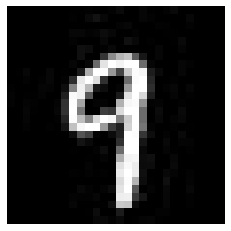

In [22]:
categorias=["0","1","2","3","4","5","6","7","8","9"]
reconocimiento=prediccion()
imagenPrueba=cv2.imread("/content/drive/MyDrive/test/9/9_11.jpg",0)
indiceCategoria=reconocimiento.predecir(imagenPrueba)
print("La imamgen cargada es ",categorias[indiceCategoria])

imagen=cv2.imread("/content/drive/MyDrive/test/9/9_11.jpg",0)

if imagen is None:
  print("error al cargar la imagen")
else:
  plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()